## Assignment 1 
CS 6180: Clustering

Kendall Stauffer  
u0688677

### Problem 1
Implement the K-Center (aka FurthestPoint) algorithm using euclidean distance as the distance function. Using your K-Center implementation, evaluate data1.csv. Preview the document with 3 centers and then try with 4 centers. Next assign each point to its nearest center (using euclidean distance as the distance function) and generate a scatter plot where each cluster is represented by a different color. Also, represent the cluster centers as solid black.

Using this same data set run K-Means using 3 centers and produce similar plots as described previously. Compare and contrast the results with K-Centers, what are the differences you are seeing. Feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans). Finally produce two cost function plots with # centers along the x-axis and cost of that clustering along the y-axis. Do this for both algorithms (K-Center and K-Means).

### Problem 1 Answer

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


#importing data for question 1
data1 = pd.read_csv('./Data/data1.csv')

print(data1.head())
print(data1.shape)

   index          x          y  cluster
0      0   7.416767   8.246789      1.0
1      1   2.214508  12.982810      1.0
2      2  10.924226   6.348020      1.0
3      3 -17.435013   6.078512      2.0
4      4 -15.932323  10.871121      2.0
(600, 4)


#### Furthest Point algorithm



In [2]:
def euclidean_distance(initial_cluster, coordinates):
    """   
    :param initial_cluster: First chosen cluster
    :param coordinates: points you want to cluster
    :return:  euclidean distances
    """
    # calculating euclidean distance
    e_dist = ((initial_cluster - coordinates)**2).sum(axis=1)
    return e_dist

def calculate_centers(coordinates, K):
    """
    :param coordinates: points you want to cluster
    :param K: number of clusters you desire
    :return: dictionary that contains both distances and cluster centers
    """
    # making array to store cluster centers in
    centers = np.empty((K, coordinates.shape[1]))
    
    # selecting first cluster center at random
    centers[0] = coordinates[np.random.randint(coordinates.shape[0])]
    print(centers[0].shape)
    # calculating distances from first cluster center
    e_distances = euclidean_distance(centers[0], coordinates)
    temp_dist = np.append(coordinates, e_distances.reshape(coordinates.shape[0], 1), axis=1)

    for i in range(1, K):
        # starts at 1 because the initial cluster center is in 0
        # pulling maximum distance and assigning as a center
        centers[i] = coordinates[np.argmax(e_distances)]
        # pulling the closest distances to the cluster centers
        e_distances = np.minimum(e_distances, euclidean_distance(centers[i], coordinates))
        temp_dist = np.append(temp_dist, e_distances.reshape(coordinates.shape[0],1), axis=1)
    
    # calculating clusters
    temp_dist = pd.DataFrame(temp_dist)
    for index, row in temp_dist.iterrows():
        temp_dist.loc[index, 'new_cluster'] = temp_dist.iloc[index, 2:].idxmin(axis=0)
    
    temp_dist['new_cluster'] = temp_dist['new_cluster'] - 2
        
       
    # storing cluster centers and distances in dictionary
    temp = {'cluster_centers': centers,
            'e_distances': temp_dist}
    return temp


##### 3 clusters

In [3]:
# calculating clusters
cluster_data = calculate_centers(data1[['x', 'y']].values, K=3)
# Extracting centers data
centers = pd.DataFrame(cluster_data['cluster_centers'])
# Extracting rest of the data
data = cluster_data['e_distances']

(2,)


In [4]:
data.head()

0          1           2           3           4  new_cluster
0   7.416767   8.246789  523.190611  523.190611  523.190611          0.0
1   2.214508  12.982810  353.447406  353.447406  353.447406          0.0
2  10.924226   6.348020  691.812678  691.812678  691.812678          0.0
3 -17.435013   6.078512    4.306505    4.306505    4.306505          0.0
4 -15.932323  10.871121   20.715794   20.715794   20.715794          0.0

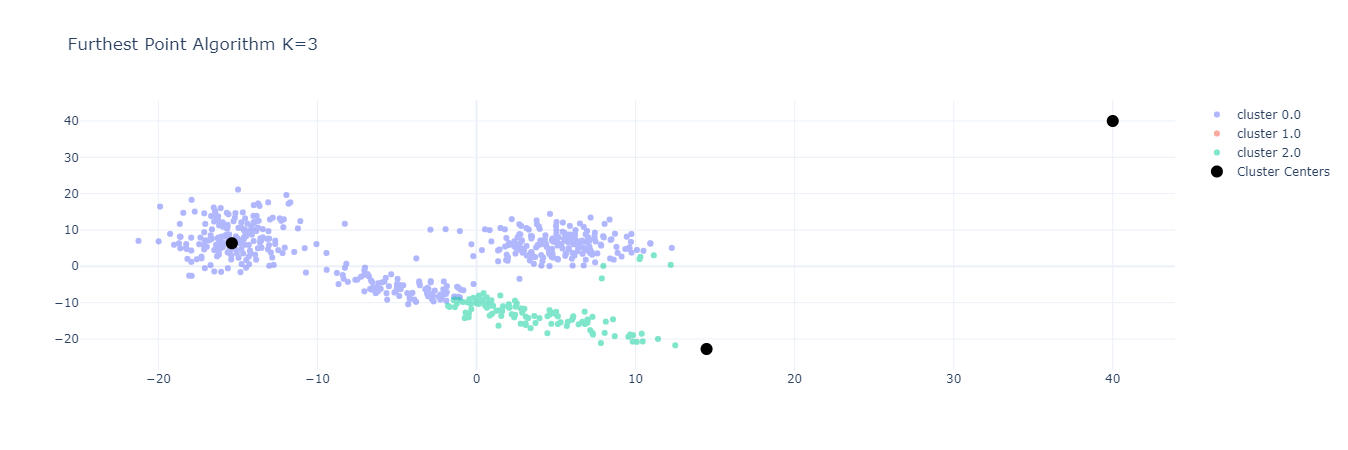

In [5]:
fig = go.Figure()
for cluster in data.new_cluster.unique():
    temp = data[data.new_cluster == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[0], y=centers[1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Furthest Point Algorithm K=3')
plotly.offline.iplot(fig, filename='temp.html')

##### 4 clusters

In [6]:
# calculating clusters
cluster_data = calculate_centers(data1[['x', 'y']].values, K=4)

# Extracting centers data
centers = pd.DataFrame(cluster_data['cluster_centers'])
# Extracting rest of the data
data = cluster_data['e_distances']



(2,)


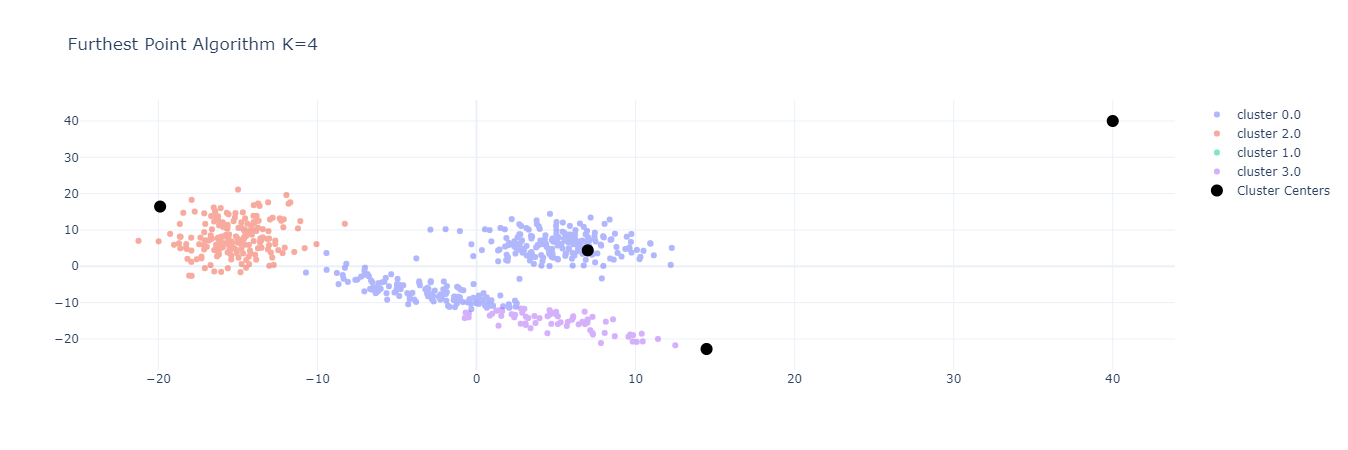

In [7]:
fig = go.Figure()
for cluster in data.new_cluster.unique():
    temp = data[data.new_cluster == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[0], y=centers[1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Furthest Point Algorithm K=4')
plotly.offline.iplot(fig, filename='temp.html')



#### Kmeans algorithm
##### 3 Clusters



In [8]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(data[[0, 1]].values)
data['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

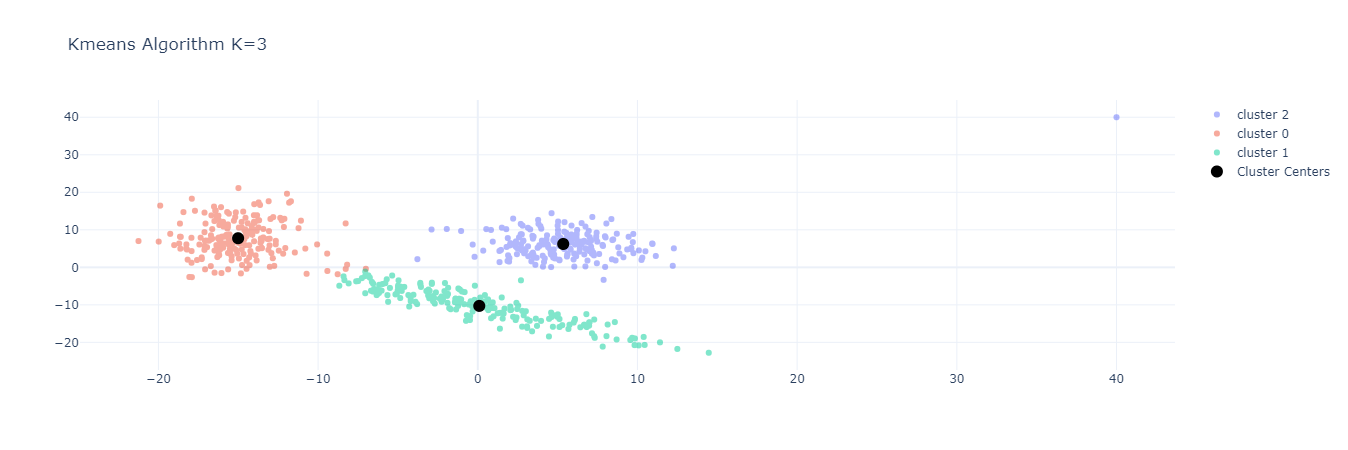

In [9]:
fig = go.Figure()
for cluster in data.kmeans_clusters.unique():
    temp = data[data.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Kmeans Algorithm K=3')
plotly.offline.iplot(fig, filename='temp.html')


4 Clusters



In [10]:
kmeans = KMeans(n_clusters=4, random_state=123).fit(data[[0, 1]].values)
data['kmeans_clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_

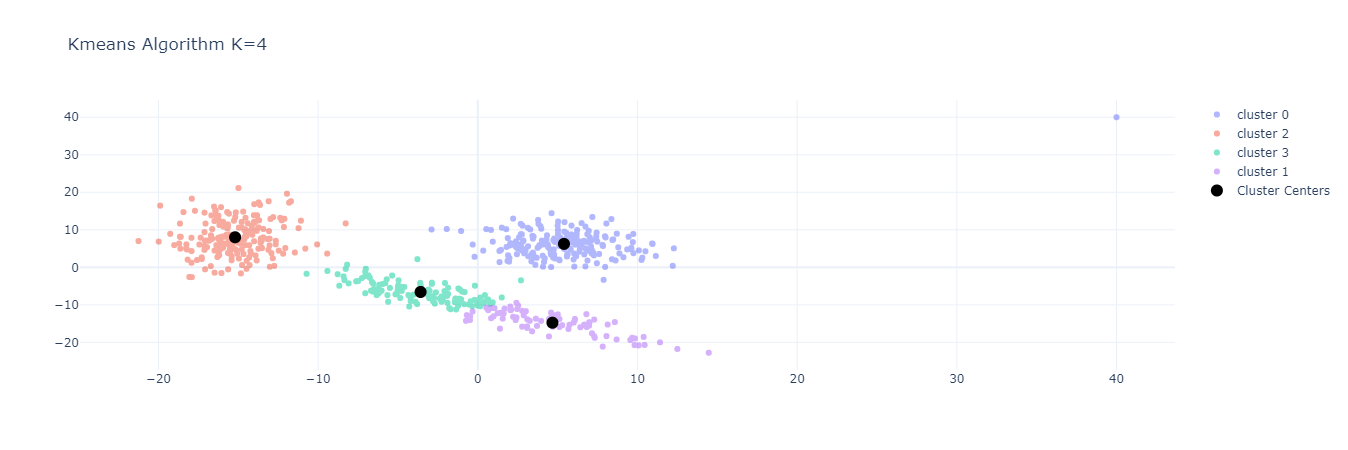

In [11]:
fig = go.Figure()
for cluster in data.kmeans_clusters.unique():
    temp = data[data.kmeans_clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp[0], y=temp[1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Kmeans Algorithm K=4')
plotly.offline.iplot(fig, filename='temp.html')


The biggest visual difference between the furthest point algorithm and kmeans is the cluster center placement.
The furthest point algorithm continuously gets distracted by the outlier point found at 40, 40. It usually places its
own cluster center there then struggles to assign the rest of the points. On the other hand Kmeans does a great job
at at assigning its centroids to the center of the clusters and now allowing outliers to influence it too much.



In [12]:
cost = []
K = range(1, 5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[[0, 1]].values)
    cost.append(km.inertia_)


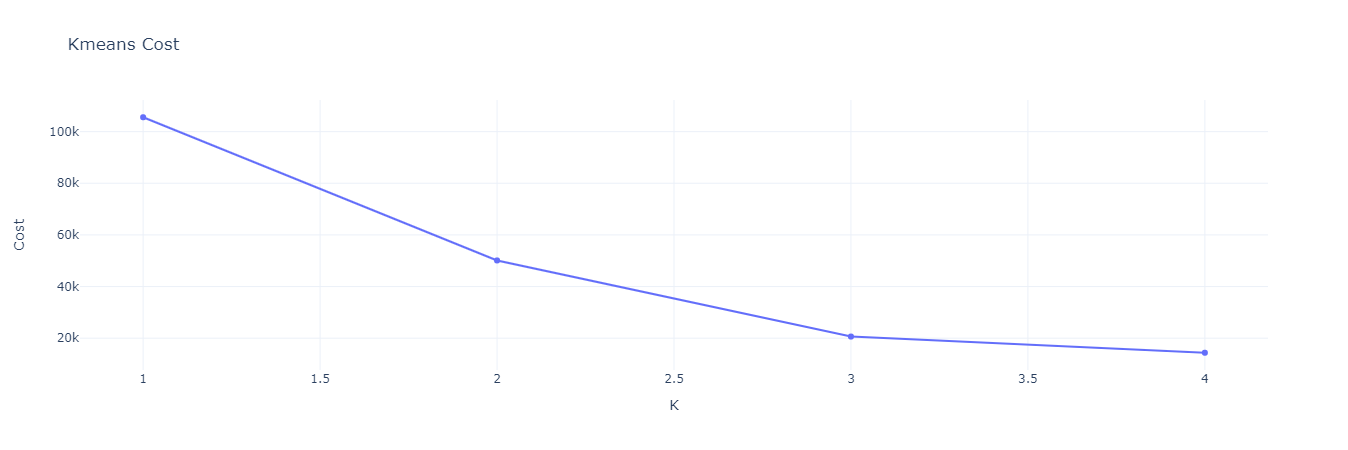

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=cost, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='Kmeans Cost', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')

In [14]:
costs = data.sum(axis=0)[2:6]
print(costs)

2    175108.883126
3    172750.232911
4     90223.015611
5     72057.753547
dtype: float64


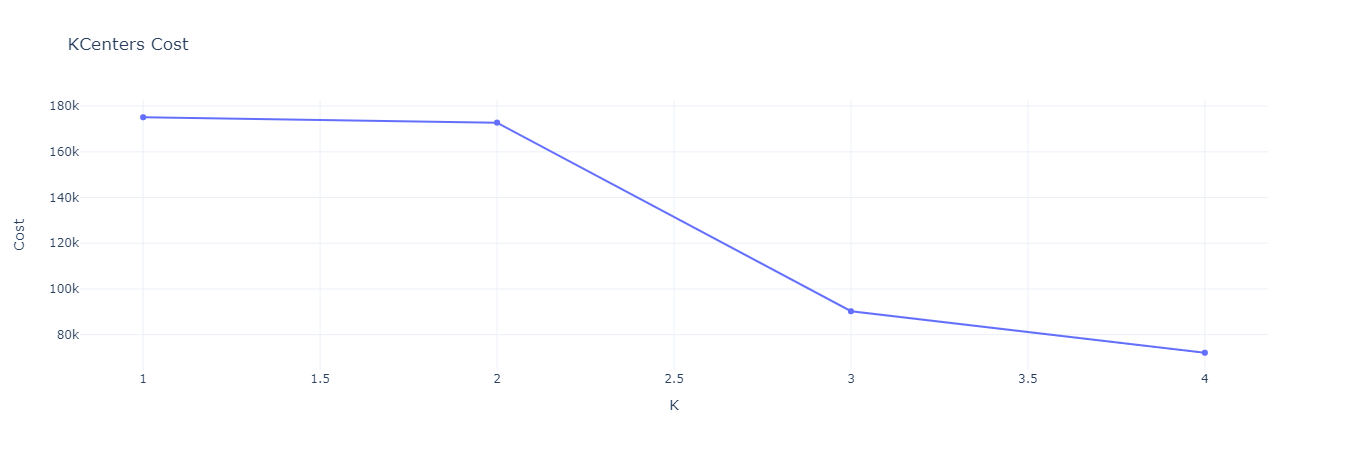

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=costs, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='KCenters Cost', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')



The cost of KMeans seems to decrease more quickly then that of KCenters for k = 4.


### Problem 2 
Generate your own data sets for running K-Means. Explore how changing the data generating 
distribution (mean, variance etc) causes K-Means to start to “break”. Again, feel free to use an 
out-of-the-box K-Means (eg. sklearn.cluster.KMeans).


### Problem 2 Answer:


In [16]:
x, y = make_blobs(n_samples=600, centers=4, cluster_std=15, n_features=2, random_state=123)
print(x)
# print(y)

[[-1.18054914e+01 -5.40402212e+00]
 [-1.23093603e+01 -1.01509129e+01]
 [-9.42031874e+00  9.85644339e-01]
 ...
 [ 7.73663086e+00 -2.13329644e-02]
 [ 1.41098030e+01  2.54641271e+01]
 [-2.74533712e+00 -1.61169234e+01]]


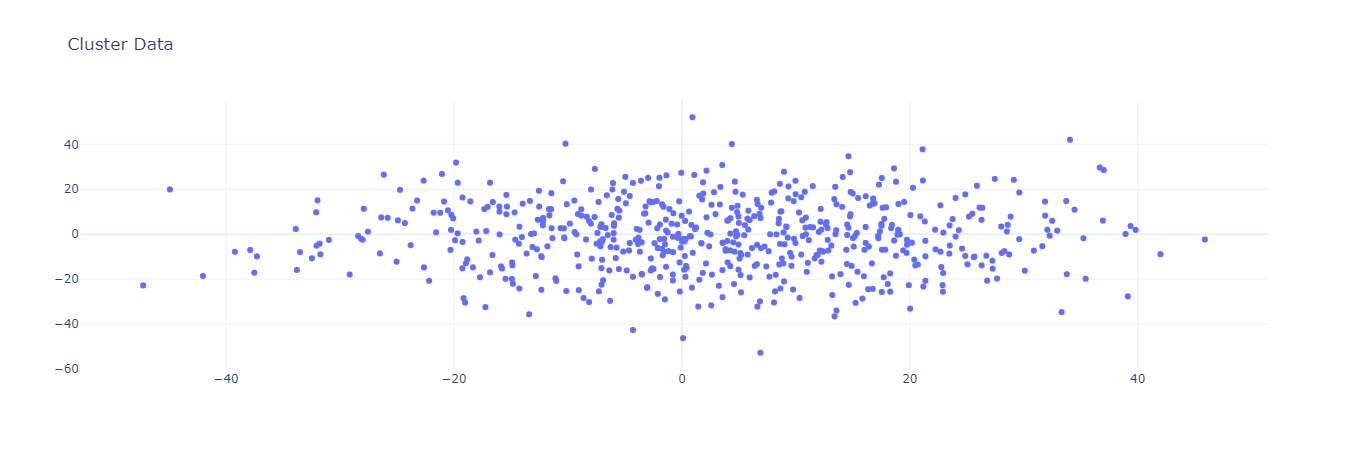

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x[:, 0], y=x[:, 1], mode='markers', name='blobs'))
fig.update_layout(template='plotly_white', title='Cluster Data')
plotly.offline.iplot(fig, filename='temp.html')





In [18]:
x = pd.DataFrame(x)
kmeans = KMeans(n_clusters=4, random_state=123).fit(x[[0, 1]].values)
x['clusters'] = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)



[[  7.81562375  17.50760869]
 [ -0.04985393 -19.28308351]
 [-14.02193231   2.41636844]
 [ 19.07452028  -4.18691988]]


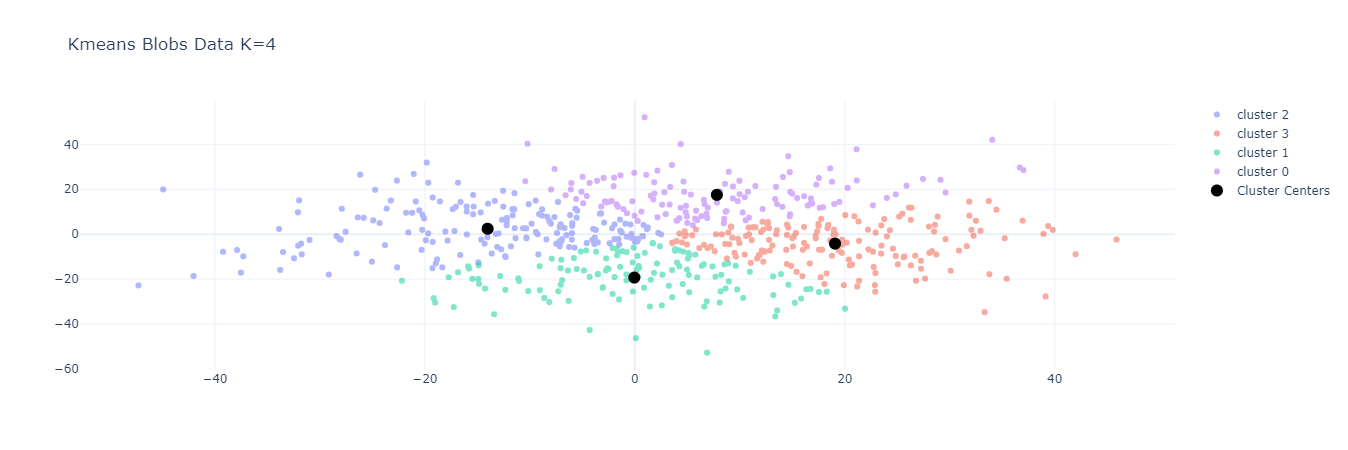

In [19]:
fig = go.Figure()
for cluster in x.clusters.unique():
    temp = x[x.clusters == cluster].reset_index(drop=True)
    fig.add_trace(go.Scatter(x=temp.iloc[:, 0], y=temp.iloc[:, 1], opacity=0.5, mode='markers', name=f'cluster {cluster}'))
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                         marker=dict(size=12, color='black'), name='Cluster Centers'))
fig.update_layout(template='plotly_white', title='Kmeans Blobs Data K=4')
plotly.offline.iplot(fig, filename='temp.html')

In [20]:
cost = []
K = range(1, 5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x[[0, 1]].values)
    cost.append(km.inertia_)


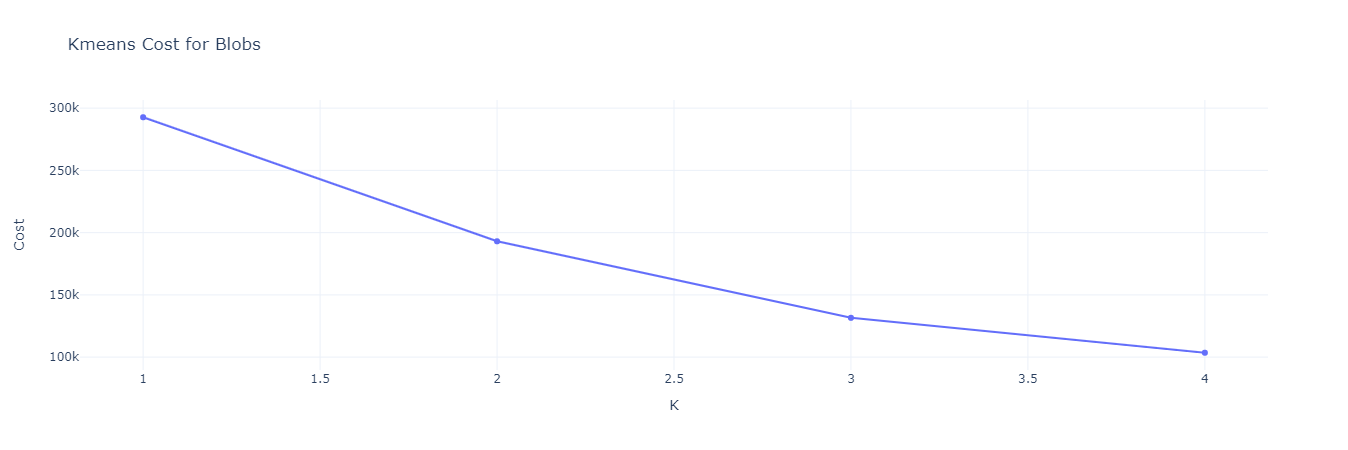

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=cost, mode='markers+lines', name='Cost'))
fig.update_layout(template='plotly_white', title='Kmeans Cost for Blobs', xaxis_title='K', yaxis_title='Cost')
plotly.offline.iplot(fig, filename='temp.html')


I ran several different iterations os the make_blobs functions to see if I could break it. It seems to do a good job 
at classifying the blob shaped data. It struggels when more are more points are generated from the dense section of the 
data. As the standard deviation of the data is increased and less defined clusters are made, kmeans will partition the data but in a meaningful way.




 
### Problem 3
Download data2.csvPreview the document and run K-Means. Experiment with different values for k and visualize and discuss the results


### Problem 3 Answer:

In [22]:
data = pd.read_csv('./Data/data2.csv')
data.head()

index         x         y  cluster
0      0  4.474084  1.172591      NaN
1      1 -1.737236 -0.926977      NaN
2      2  4.118955  2.475785      NaN
3      3  1.105185  0.640976      NaN
4      4  4.821377  0.579391      NaN

1
0
2
0
1
2
0
1
3
2
0
3
4
1


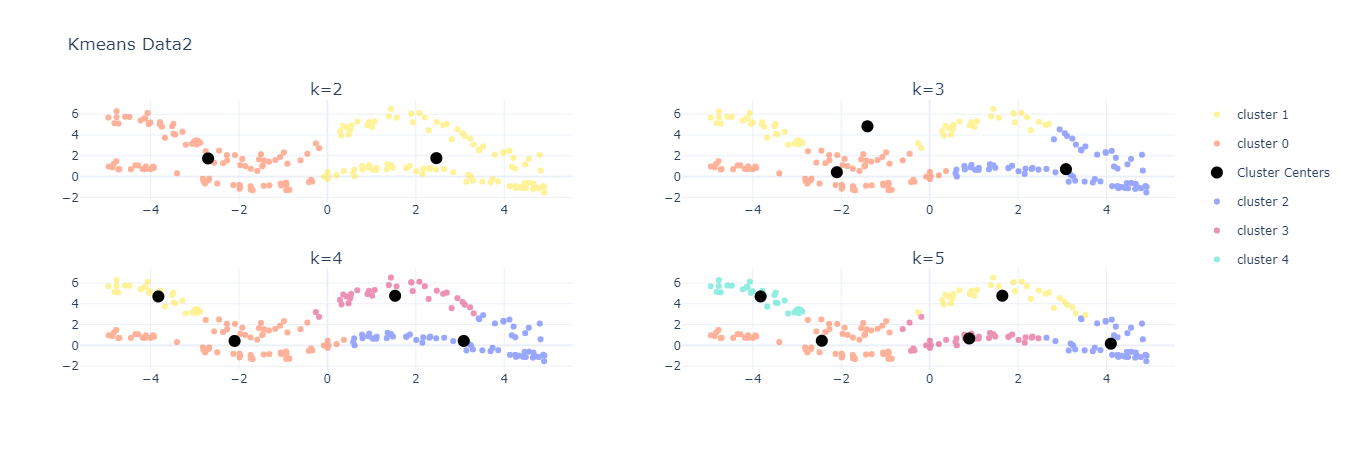

In [23]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['k=2', 'k=3', 'k=4', 'k=5'])

cmap ={ 0: '#FF6433', 1: '#FFE633', 2: '#334EFF', 3: '#DA2569', 4: '#25DAC3'}

plot_loc = {2:[1, 1], 
            3: [1, 2],
            4: [2, 1],
            5: [2, 2]}

K=[2, 3, 4, 5]

legend = []
for i, k in enumerate(K):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(data[['x', 'y']].values)
    data[f'clusters_{k}'] = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i == 0:
        cc_legend = True
    else:
        cc_legend = False
        
    for cluster in data[f'clusters_{k}'].unique():
        if cluster not in legend:
            legend.append(cluster)
            show_legend = True
        else:
            show_legend = False

        temp = data[data[f'clusters_{k}'] == cluster].reset_index(drop=True)
        fig.add_trace(go.Scatter(x=temp['x'], y=temp['y'], opacity=0.5, 
                                 mode='markers', name=f'cluster {cluster}', legendgroup=f'cluster {cluster}', marker=dict(color=cmap[cluster]),  showlegend=show_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])
    fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1], mode='markers', 
                             marker=dict(size=12, color='black'), name='Cluster Centers', legendgroup='Cluster Centers', showlegend=cc_legend), 
                      row=plot_loc[k][0], col=plot_loc[k][1])

fig.update_layout(template='plotly_white', title=f'Kmeans Data2')
plotly.offline.iplot(fig, filename='temp.html')
    

It's interesting at how poorly kmeans does at clustering non blob like data. In this dataset the points as seen above are easily described as squiggly lines. It has a hard time selecting just the parts of the two sets of points. Because of how it works it continues to combine points from waht could be two different sets of clusters. A good example of this is when k=2. Instead of clustering by the lines it segments the clustters in half down the xaxis 0.


### Problem 4
Use the K-Center procedure described in Problem 1 to implement a different HAC algorithm based on the discussion in class. Apply this algorithm to data2.csv. Preview the document experimenting with different values for k and visualize and discuss results.


In [24]:
### Problem 4 Answer

In [72]:
data =  data[['x', 'y']].copy()
print(data.head())
print(data.shape)

          x         y
0  4.474084  1.172591
1 -1.737236 -0.926977
2  4.118955  2.475785
3  1.105185  0.640976
4  4.821377  0.579391
(200, 2)


In [73]:
distances = pd.DataFrame()
for index, rows in data.iterrows():
   distances[f'{index}'] = euclidean_distance(data.iloc[:, 0:2], data.iloc[index, 0:2])

In [74]:
print(distances.head())
print(distances.shape)

           0          1          2          3          4          5  \
0   0.000000  42.988679   1.824431  11.632093   0.472499  41.517674   
1  42.988679   0.000000  45.873768  10.537833  45.284552   4.153896   
2   1.824431  45.873768   0.000000  12.449337   4.089706  38.960540   
3  11.632093  10.537833  12.449337   0.000000  13.813876   9.658829   
4   0.472499  45.284552   4.089706  13.813876   0.000000  46.376803   

           6           7          8          9  ...        190        191  \
0   3.610081   93.131898   6.818581  76.643408  ...  35.014912  12.173130   
1  29.599217   47.869731  16.862650  10.457313  ...   6.249134  10.131271   
2   9.389948   77.393795   7.129814  72.515007  ...  31.651114  12.889079   
3   8.123961   51.558792   0.740168  29.184591  ...   7.265624   0.006978   
4   2.572935  104.788178   8.948183  83.075818  ...  40.041492  14.431421   

         192        193        194        195        196        197  \
0   2.875444  13.637093   2.543420   4.

In [75]:
distances[distances > 0].iloc[:, 0].idxmin(axis=0)

188

In [78]:
distances = distances[distances > 0].iloc[:, :]
distances

0          1          2          3          4          5  \
0          NaN  42.988679   1.824431  11.632093   0.472499  41.517674   
1    42.988679        NaN  45.873768  10.537833  45.284552   4.153896   
2     1.824431  45.873768        NaN  12.449337   4.089706  38.960540   
3    11.632093  10.537833  12.449337        NaN  13.813876   9.658829   
4     0.472499  45.284552   4.089706  13.813876        NaN  46.376803   
..         ...        ...        ...        ...        ...        ...   
195   4.536576  24.024471   9.754641   5.443215   3.957845  28.677531   
196  26.517841  19.166435  19.707815   8.390831  32.679008   7.311393   
197  37.795967  65.508990  23.531016  34.651725  46.719623  40.982523   
198  83.287375  39.801068  69.166692  43.324135  94.087509  18.847878   
199  47.201057   0.117493  50.517816  12.813251  49.393470   5.102544   

             6           7          8          9  ...        190        191  \
0     3.610081   93.131898   6.818581  76.643408  ...  35.014912  12.173130   
1    29.599217   47.869731  16.862650  10.457313  ...   6.249134  10.131271   
2     9.389948   77.393795   7.129814  72.515007  ...  31.651114  12.889079   
3     8.123961   51.558792   0.740168  29.184591  ...   7.265624   0.006978   
4     2.572935  104.788178   8.948183  83.075818  ...  40.041492  14.431421   
..         ...         ...        ...        ...  ...        ...        ...   
195   0.302480   89.468082   3.988881  57.569923  ...  25.122990   5.821689   
196  29.709983   20.498673   9.160513  20.656470  ...   4.059311   8.089421   
197  55.155797   31.744328  30.166884  62.360701  ...  32.870719  34.518551   
198  87.325870    0.387917  47.988713  15.968763  ...  17.714772  42.383426   
199  32.609271   49.834227  19.707200  10.235224  ...   7.680730  12.373402   

           192        193        194        195        196        197  \
0     2.875444  13.637093   2.543420   4.536576  26.517841  37.795967   
1    38.565181  10.152640  30.422180  24.024471  19.166435  65.508990   
2     0.470648  13.236249   7.527459   9.754641  19.707815  23.531016   
3     8.922578   0.247270   7.696609   5.443215   8.390831  34.651725   
4     5.659262  16.492457   1.851903   3.957845  32.679008  46.719623   
..         ...        ...        ...        ...        ...        ...   
195   9.104138   7.859893   0.411791        NaN  25.195646  52.052878   
196  14.124302   5.820451  27.783134  25.195646        NaN  13.931915   
197  20.036687  30.646505  50.966212  52.052878  13.931915        NaN   
198  58.611633  37.087663  84.545139  78.709538  15.867107  29.554802   
199  42.882735  12.445008  33.603218  26.792191  21.951531  70.700297   

           198        199  
0    83.287375  47.201057  
1    39.801068   0.117493  
2    69.166692  50.517816  
3    43.324135  12.813251  
4    94.087509  49.393470  
..         ...        ...  
195  78.709538  26.792191  
196  15.867107  21.951531  
197  29.554802  70.700297  
198        NaN  41.678287  
199  41.678287        NaN  

[200 rows x 200 columns]

In [80]:
distances.fillna(float('inf'), inplace=True)
distances

0          1          2          3          4          5  \
0          inf  42.988679   1.824431  11.632093   0.472499  41.517674   
1    42.988679        inf  45.873768  10.537833  45.284552   4.153896   
2     1.824431  45.873768        inf  12.449337   4.089706  38.960540   
3    11.632093  10.537833  12.449337        inf  13.813876   9.658829   
4     0.472499  45.284552   4.089706  13.813876        inf  46.376803   
..         ...        ...        ...        ...        ...        ...   
195   4.536576  24.024471   9.754641   5.443215   3.957845  28.677531   
196  26.517841  19.166435  19.707815   8.390831  32.679008   7.311393   
197  37.795967  65.508990  23.531016  34.651725  46.719623  40.982523   
198  83.287375  39.801068  69.166692  43.324135  94.087509  18.847878   
199  47.201057   0.117493  50.517816  12.813251  49.393470   5.102544   

             6           7          8          9  ...        190        191  \
0     3.610081   93.131898   6.818581  76.643408  ...  35.014912  12.173130   
1    29.599217   47.869731  16.862650  10.457313  ...   6.249134  10.131271   
2     9.389948   77.393795   7.129814  72.515007  ...  31.651114  12.889079   
3     8.123961   51.558792   0.740168  29.184591  ...   7.265624   0.006978   
4     2.572935  104.788178   8.948183  83.075818  ...  40.041492  14.431421   
..         ...         ...        ...        ...  ...        ...        ...   
195   0.302480   89.468082   3.988881  57.569923  ...  25.122990   5.821689   
196  29.709983   20.498673   9.160513  20.656470  ...   4.059311   8.089421   
197  55.155797   31.744328  30.166884  62.360701  ...  32.870719  34.518551   
198  87.325870    0.387917  47.988713  15.968763  ...  17.714772  42.383426   
199  32.609271   49.834227  19.707200  10.235224  ...   7.680730  12.373402   

           192        193        194        195        196        197  \
0     2.875444  13.637093   2.543420   4.536576  26.517841  37.795967   
1    38.565181  10.152640  30.422180  24.024471  19.166435  65.508990   
2     0.470648  13.236249   7.527459   9.754641  19.707815  23.531016   
3     8.922578   0.247270   7.696609   5.443215   8.390831  34.651725   
4     5.659262  16.492457   1.851903   3.957845  32.679008  46.719623   
..         ...        ...        ...        ...        ...        ...   
195   9.104138   7.859893   0.411791        inf  25.195646  52.052878   
196  14.124302   5.820451  27.783134  25.195646        inf  13.931915   
197  20.036687  30.646505  50.966212  52.052878  13.931915        inf   
198  58.611633  37.087663  84.545139  78.709538  15.867107  29.554802   
199  42.882735  12.445008  33.603218  26.792191  21.951531  70.700297   

           198        199  
0    83.287375  47.201057  
1    39.801068   0.117493  
2    69.166692  50.517816  
3    43.324135  12.813251  
4    94.087509  49.393470  
..         ...        ...  
195  78.709538  26.792191  
196  15.867107  21.951531  
197  29.554802  70.700297  
198        inf  41.678287  
199  41.678287        inf  

[200 rows x 200 columns]

In [106]:
distances.iloc[0, 188]

0.13409593174227674

In [82]:
distances.idxmin()

0      188
1       89
2       94
3       75
4      124
      ... 
195    123
196     69
197    160
198    102
199     17
Length: 200, dtype: int64

In [83]:
distances.min()

0      0.134096
1      0.049953
2      0.034748
3      0.003339
4      0.363681
         ...   
195    0.031867
196    0.213226
197    0.417159
198    0.040329
199    0.020251
Length: 200, dtype: float64

In [87]:
distances.iloc[1, 89]

0.04995280361362723

In [109]:
min_index = distances.idxmin().reset_index().rename(columns={'index': 'row',
                                                            0: 'col'})


In [111]:
min_index = min_index.astype(int)

In [110]:
data.iloc[0, 0:2] + data.iloc[188, 0:2]

x    8.645203
y    2.139491
dtype: float64

In [119]:

for row, col in min_index.iterrows():
    temp = data.iloc[min_index.row, 0:2] + data.iloc[col['col'], 0:2]

In [141]:
data.iloc[min_index.row, 0:2].shape

(200, 2)

In [140]:
data.iloc[min_index.col, 0:2].shape

(200, 2)

In [148]:
data.iloc[min_index.row, 0:2] + data.iloc[min_index.col, 0:2].reset_index(drop=True)

x          y
0    8.645203   2.139491
1   -3.453476  -2.076467
2    8.099684   4.826503
3    2.157811   1.305956
4    9.072321   1.354451
..        ...        ...
195  6.436798  -0.882142
196 -0.450517   5.933741
197  3.335640  12.583591
198 -7.578787  10.275387
199 -3.966066  -2.179772

[200 rows x 2 columns]

In [151]:
data.iloc[0, :]

x    4.474084
y    1.172591
Name: 0, dtype: float64

In [152]:
data.iloc[188, :]

x    4.171119
y    0.966900
Name: 188, dtype: float64

In [157]:
data.iloc[188, :] + data.iloc[0, :]

x    8.645203
y    2.139491
dtype: float64

In [158]:
data.iloc[0, :] + data.iloc[188, :]

x    8.645203
y    2.139491
dtype: float64

In [182]:
col_to_drop = []
for index, col in min_index:
    data.iloc[index, :] = data.iloc[index, :] + data.iloc[col['col'], :]
    col_to_drop.append(col['col'])

ValueError: too many values to unpack (expected 2)

In [ ]:
data = data.drop(rows = [0, 188])

In [ ]:
def hac(data):
    distances = pd.DataFrame()
    while data.shape[0] > 1:
    #   calculate distance matrix for all points
        for index, rows in data.iterrows():
           distances[f'{index}'] = euclidean_distance(data.iloc[:, 0:2], data.iloc[index, 0:2])
    #   remove all zeros from the diagnol
        distances = distances[distances > 0].iloc[:, :]
    #   filling nans with inf
        distances.fillna(float('inf'), inplace=True)
    #   pulling the index of minimum distances from distance matrix
        min_index = distances.idxmin().reset_index().rename(columns={'index': 'row', 0: 'col'})
        data.iloc[min_index['row'], min_index['col']]
    #   Sum the x and y coordinates
    #   remove original points from input matrix
    #   re-calculate distance matrix     

    
    

    
